In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [3]:
# 设定目录路径
dir_path = "./"

# 获取目录中所有的.npy文件
file_names = [f for f in os.listdir(dir_path) if f.endswith('_reward_logs.npy') and f.split('_')[0].isdigit()]

In [4]:
file_names

['0_reward_logs.npy', '1_reward_logs.npy', '2_reward_logs.npy']

In [7]:
# 设定目录路径
dir_path = "./"

# 获取目录中所有的.npy文件
file_names = [f for f in os.listdir(dir_path) if f.endswith('_reward_logs.npy') and f.split('_')[0].isdigit()]

# 按文件名中的数字排序
file_names.sort(key=lambda x: int(x.split('_')[0]))

# 读取每个文件中的数据
rewards = []
for file_name in file_names:
    file_path = os.path.join(dir_path, file_name)
    reward_data = np.load(file_path)
    rewards.append(reward_data)



In [10]:
dir_path = "./"
exp_num = 3
rewards = []
for expId in range(exp_num):
    file_path = dir_path + "/" + str(expId) +"_reward_logs.npy"
    print("file path = " + file_path)
    reward_log = np.load(file_path)
    rewards.append(reward_log)

file path = .//0_reward_logs.npy
file path = .//1_reward_logs.npy
file path = .//2_reward_logs.npy


In [11]:
len(rewards)

3

In [12]:
rewards[0].shape

(20, 3)

In [13]:
save_dir = "Res_H_Env_Pen"
file_name = f"FMRL_Baseline_EnsNumEachClient=1.npy"
np.save(os.path.join(save_dir, file_name), rewards)

FileNotFoundError: [Errno 2] No such file or directory: 'Res_H_Env_Pen\\FMRL_Baseline_EnsNumEachClient=1.npy'

In [19]:
np.mean(rewards[0],axis=1)

array([-1121.63080059,  -978.57443997,  -870.43928459,  -192.33737555,
        -223.42904166,  -214.64800237,  -276.99308195,  -188.20727809,
        -193.1482416 ,  -219.09210659,  -305.94872993,  -199.1981968 ,
        -214.81249925,  -403.20338859,  -228.75312087,  -282.64443689,
        -234.22005243,  -228.14758207,  -189.47204028,  -165.92565953])

In [20]:
np.mean(rewards[1],axis=1)

array([-1239.80795828, -1038.71349747, -1016.99076487, -1062.96052669,
        -720.7855136 ,  -612.90373203,  -836.0117904 ,  -259.34522607,
        -273.00194372,  -287.90206081,  -473.58814163,  -495.16456752,
        -397.06209743,  -280.28305771,  -246.58357211,  -266.61050593,
        -265.35190773,  -267.46613242,  -259.5994906 ,  -265.38729358])

In [21]:
np.mean(rewards[2],axis=1)

array([-1118.7711361 , -1181.91921233, -1020.0051202 ,  -727.746096  ,
        -714.16261263,  -903.8763618 ,  -824.22657657,  -786.15667127,
        -828.62985012,  -878.57510789,  -763.36583012,  -806.6744266 ,
        -964.40962319, -1153.97491498,  -541.48455158,  -323.47492516,
        -317.95000518,  -236.79179833,  -258.73431633,  -286.9444263 ])

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def plot_all_experiments(rewards, plot_individual_envs=False):
    num_experiments = len(rewards)
    num_rounds, num_envs = rewards[0].shape

    all_rewards = np.array(rewards)
    
    # 计算每个环境的均值和方差
    mean_rewards = np.mean(all_rewards, axis=0)
    std_rewards = np.std(all_rewards, axis=0)
    
    # 计算所有环境的均值和方差
    avg_mean_rewards = np.mean(mean_rewards, axis=1)
    avg_std_rewards = np.std(mean_rewards, axis=1)

    # 打印每个环境的最终奖励值和方差
    print("Final rewards and standard deviations for each environment:")
    for env in range(num_envs):
        final_mean_reward = mean_rewards[-1, env]
        final_std_reward = std_rewards[-1, env]
        print(f"Environment {env + 1} - Final Mean Reward: {final_mean_reward:.2f}, Final Std Dev: {final_std_reward:.2f}")

    # 打印所有环境的最终奖励值和方差
    final_avg_mean_reward = avg_mean_rewards[-1]
    final_avg_std_reward = avg_std_rewards[-1]
    print(f"All Environments - Final Average Mean Reward: {final_avg_mean_reward:.2f}, Final Std Dev: {final_avg_std_reward:.2f}")

    if plot_individual_envs:
        for env in range(num_envs):
            plt.figure(figsize=(12, 8), dpi=100)
            plt.plot(mean_rewards[:, env], label=f'Environment {env + 1}', linewidth=2)
            plt.fill_between(range(num_rounds), mean_rewards[:, env] - std_rewards[:, env], mean_rewards[:, env] + std_rewards[:, env], alpha=0.2)
            
            plt.xlabel('Rounds', fontsize=14)
            plt.ylabel('Reward', fontsize=14)
            plt.title(f'Mean Rewards for Environment {env + 1}', fontsize=16)
            plt.legend(fontsize=12)
            plt.grid(True)  # 添加网格线
            plt.show()
        
        # 绘制平均值的图
        plt.figure(figsize=(12, 8), dpi=100)
        plt.plot(avg_mean_rewards, label='Average', linestyle='--', color='black', linewidth=2)
        plt.fill_between(range(num_rounds), avg_mean_rewards - avg_std_rewards, avg_mean_rewards + avg_std_rewards, color='black', alpha=0.2)
        
        plt.xlabel('Rounds', fontsize=14)
        plt.ylabel('Reward', fontsize=14)
        plt.title('Mean Rewards Across All Experiments', fontsize=16)
        plt.legend(fontsize=12)
        plt.grid(True)  # 添加网格线
        plt.show()

    # 绘制所有环境的均值和方差
    plt.figure(figsize=(12, 8), dpi=100)
    for env in range(num_envs):
        plt.plot(mean_rewards[:, env], label=f'Environment {env + 1}', linewidth=2)
        plt.fill_between(range(num_rounds), mean_rewards[:, env] - std_rewards[:, env], mean_rewards[:, env] + std_rewards[:, env], alpha=0.2)
    
    plt.plot(avg_mean_rewards, label='Average', linestyle='--', color='black', linewidth=2)
    plt.fill_between(range(num_rounds), avg_mean_rewards - avg_std_rewards, avg_mean_rewards + avg_std_rewards, color='black', alpha=0.2)

    plt.xlabel('Rounds', fontsize=14)
    plt.ylabel('Reward', fontsize=14)
    plt.title('Mean Rewards Across All Experiments', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)  # 添加网格线
    plt.show()


Final rewards and standard deviations for each environment:
Environment 1 - Final Mean Reward: -242.94, Final Std Dev: 66.63
Environment 2 - Final Mean Reward: -241.66, Final Std Dev: 50.18
Environment 3 - Final Mean Reward: -233.66, Final Std Dev: 52.05
All Environments - Final Average Mean Reward: -239.42, Final Std Dev: 4.11


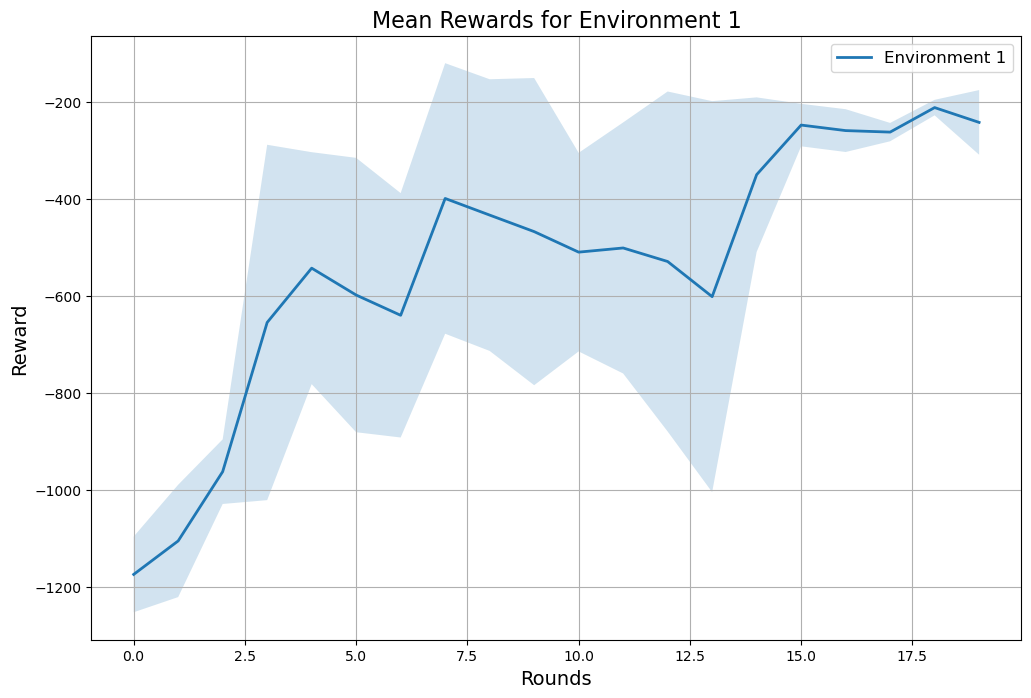

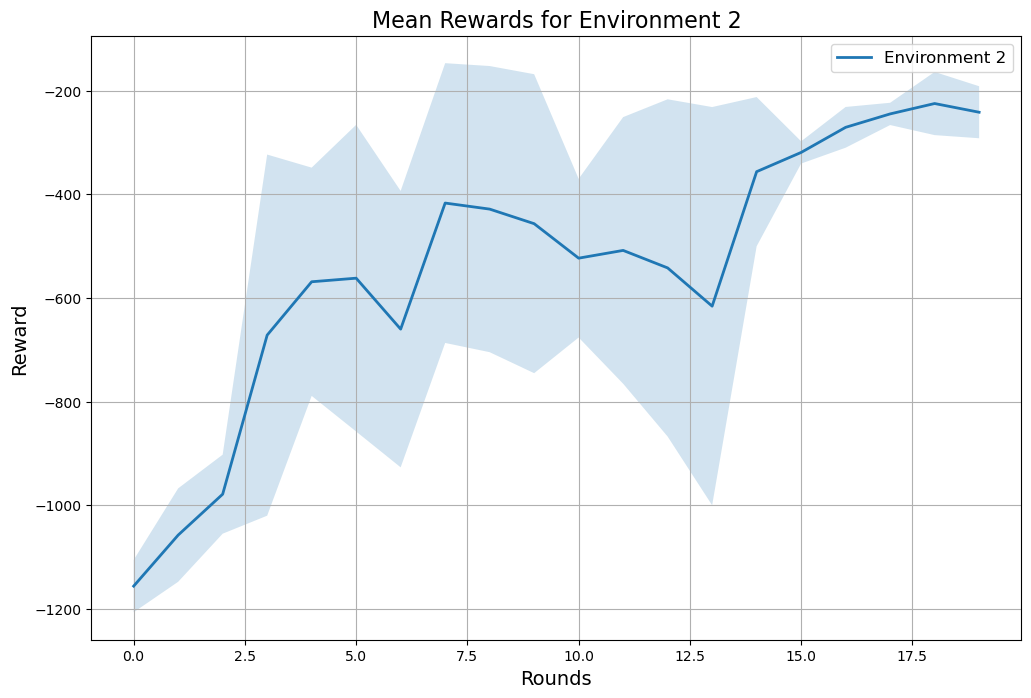

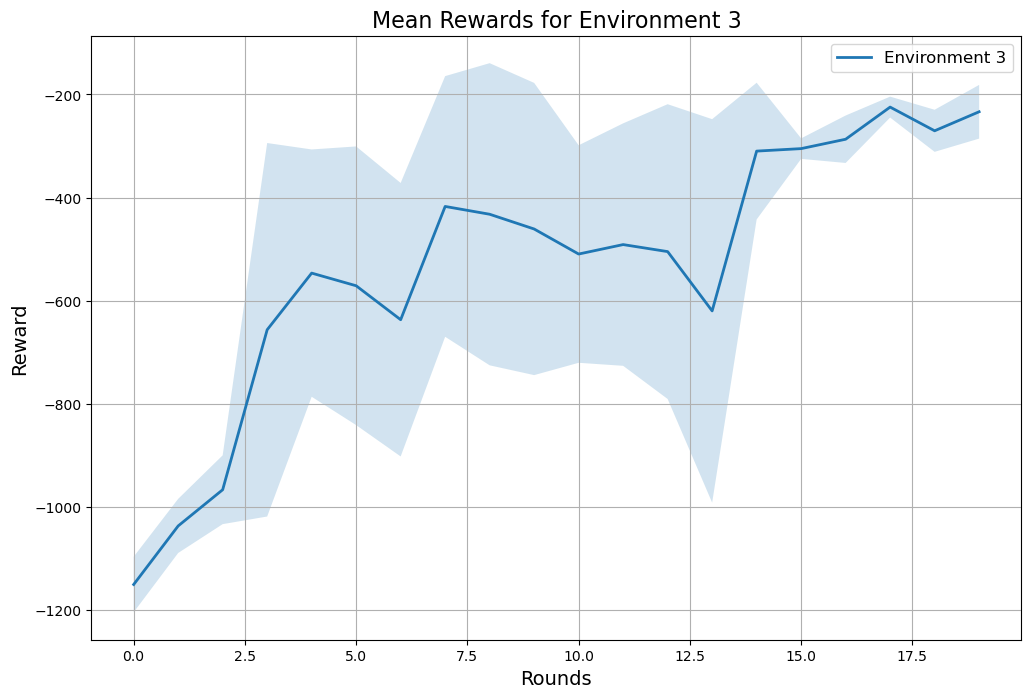

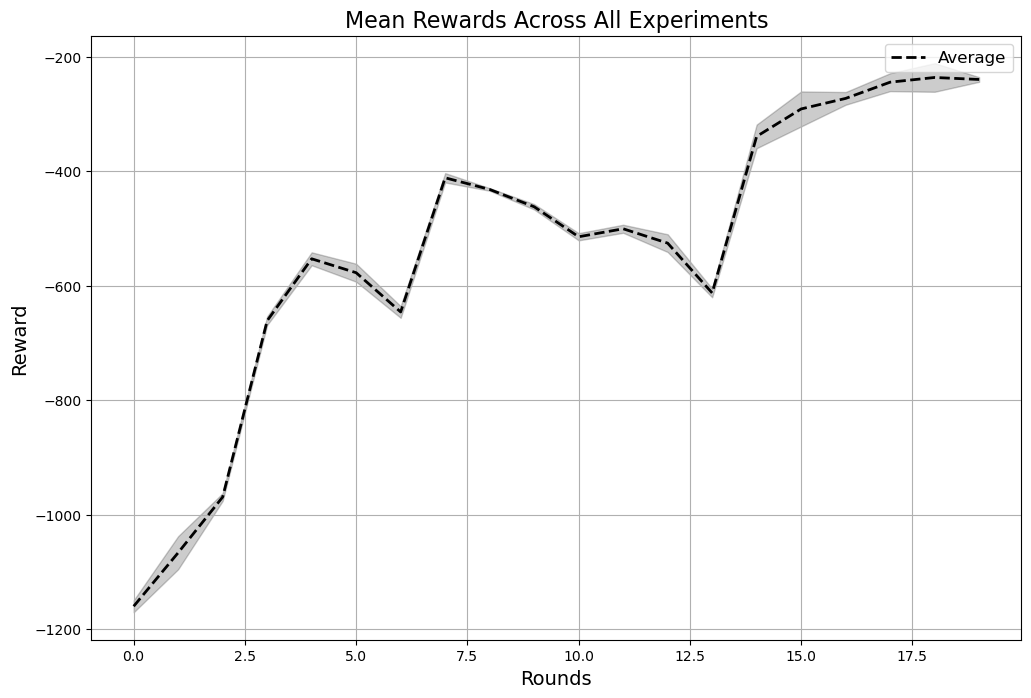

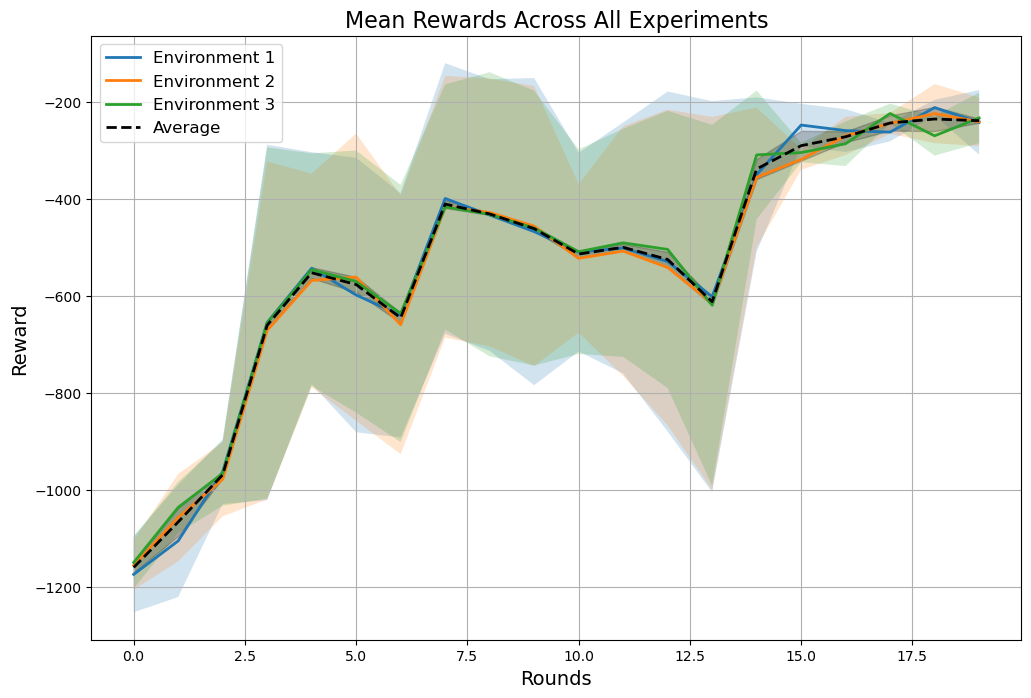

In [15]:
# 绘制所有实验的结果，设置plot_individual_envs=True以单独绘制每个环境的图
plot_all_experiments(rewards, plot_individual_envs=True)

In [25]:
env_avg_rewards = []

In [26]:
env_avg_rewards = []
for expId in range(len(rewards)):
    print(expId)
    env_avg_rewards.append(np.mean(rewards[expId], axis=1))

0
1
2
3
4


In [27]:
env_avg_rewards

[array([-1162.87310139, -1155.77060246, -1136.40706042, -1122.21443713,
        -1028.92400753,  -921.36123233,  -438.82984867,  -540.30023028,
         -271.5763098 ,  -321.56340161,  -445.46732171,  -336.4146122 ,
         -382.45525372,  -230.60157602,  -346.99657288,  -393.64093993,
         -164.81415263,  -232.50179867,  -282.82562419,  -259.07169777,
         -298.41811559,  -175.03559592,  -284.25115296,  -333.19462566,
         -230.06015969,  -198.88437605,  -223.07510001,  -184.65315674,
         -170.78234139,  -198.67482725]),
 array([-1128.01384397, -1131.57393588, -1132.20560014, -1060.51954604,
         -971.35746298,  -902.03743204,  -866.07598208,  -301.07790204,
         -439.47518936,  -472.32619499,  -468.59319263,  -195.19347567,
         -246.5150615 ,  -215.50048394,  -374.42725675,  -444.65471947,
         -571.64934023,  -470.32631994,  -324.02132682,  -549.55477867,
         -420.40645533,  -373.12247424,  -554.05221866,  -491.64565703,
         -350.24672987

In [28]:
save_dir = "Res_H_Env_Pen"
file_name = f"EnvAvg_FMRL_Baseline_EnsNumEachClient=1.npy"
np.save(os.path.join(save_dir, file_name), env_avg_rewards)